# CAR PRICE PREDICTION MACHINE LEARNING MODEL

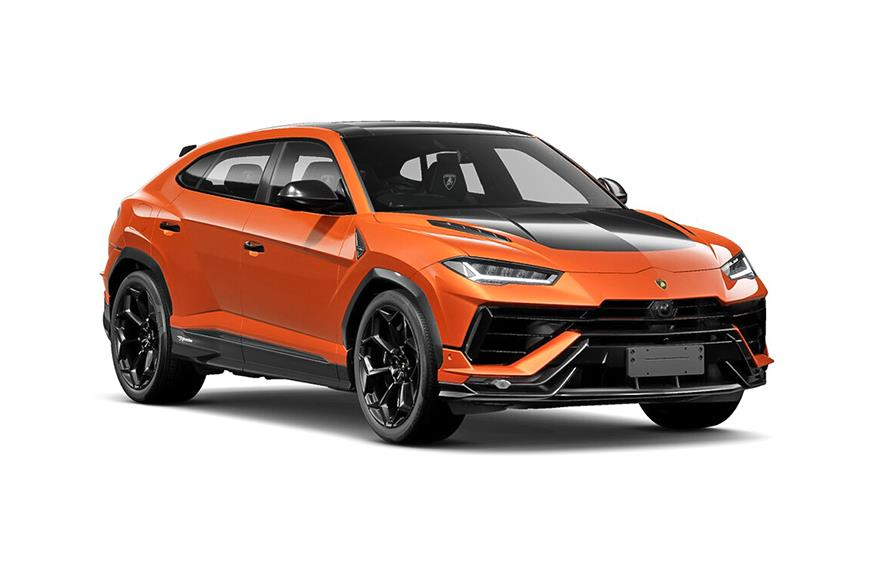

## IMPORT PYTHON LIBRARIES

In [1]:
# libraries for Processing Data
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warning Filter
import warnings
warnings.simplefilter('ignore')

In [2]:
# Loading Dataset

data = pd.read_csv('car_prediction_data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
features = data[['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

for col in features:
    print('-------------------------')
    print('Feature Column is --',[col])
    print(f'Unique values in {col} --\n',features[col].unique())
    print(f'\nTotal values in {col} --\n\n',features[col].nunique())
    print('-------------------------')
    

-------------------------
Feature Column is -- ['Car_Name']
Unique values in Car_Name --
 ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 '

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Checking for Null Values in Dataset
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


## OBERVATION FROM THE ABOVE DATASET

- No null value present in the given dataset.
- The dataset contains total 301 rows and 9 columns.
- The dataset is collected from 2007 to 2014.
- Other than Year,Current_Price,Selling_Price,Kms_Driven,Owner. All features are categorical 

In [10]:
# Adding Current_Year as Feature in the Dataset
data['Current_Year'] = 2023

In [11]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [12]:
data['No_Year'] = data['Current_Year'] - data['Year']

In [13]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [14]:
data.drop(['Year','Current_Year'],axis=1,inplace=True)

In [15]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [16]:
# Insights on Collected Information.

columns  = data[['Fuel_Type','Seller_Type','Transmission']]
for col in columns:
    print('-------------------')
    print(col)
    print(f'Feature Information on {col}-->\n',data[col].value_counts())

-------------------
Fuel_Type
Feature Information on Fuel_Type-->
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
-------------------
Seller_Type
Feature Information on Seller_Type-->
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
-------------------
Transmission
Feature Information on Transmission-->
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [17]:
# After Dropping Car_Name column from the dataset, Final dataset as follows.
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [18]:
data.drop(['Car_Name'],axis=1,inplace=True)

In [19]:
df = pd.get_dummies(data,drop_first=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [21]:
# Checking Correlation Matrix
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


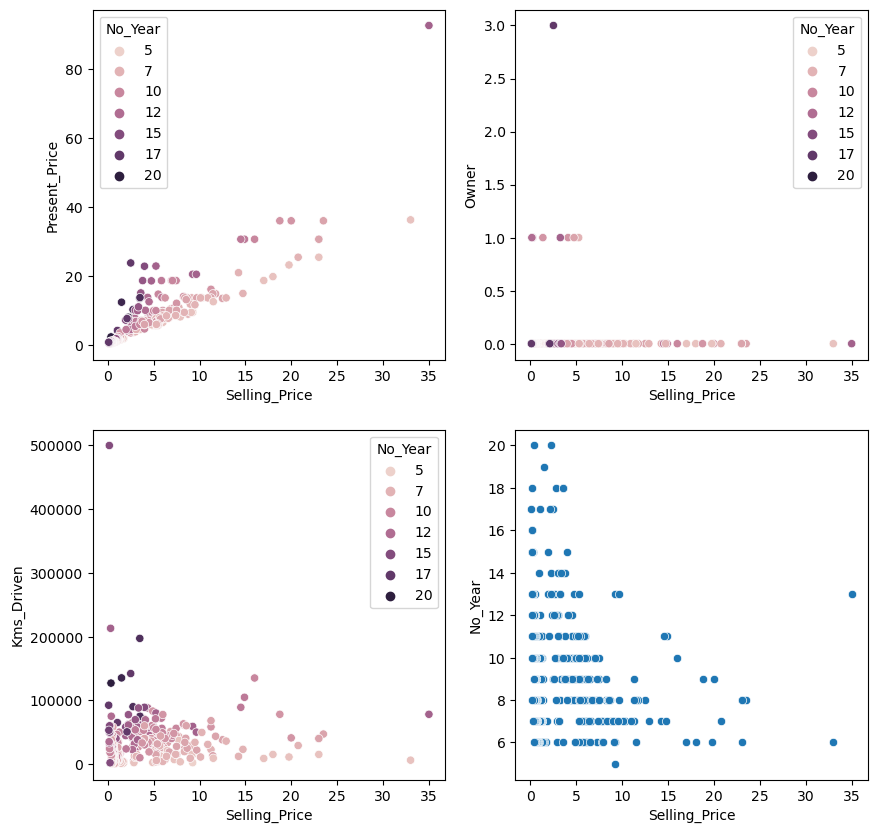

In [22]:
fig,ax = plt.subplots(2,2,figsize = (10,10),facecolor= 'white')
sns.scatterplot(ax = ax[0][0], x = df.Selling_Price,y = df.Present_Price,hue= df.No_Year)
sns.scatterplot(ax = ax[0][1], x = df.Selling_Price,y = df.Owner,hue= df.No_Year)
sns.scatterplot(ax = ax[1][0], x = df.Selling_Price,y = df.Kms_Driven,hue= df.No_Year)
sns.scatterplot(ax = ax[1][1], x = df.Selling_Price,y = df.No_Year)
plt.show()

In [23]:
# Splitting of the Dataset as Features [X] and Target [y]

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [24]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [25]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Feature Importance

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [27]:
print(model.feature_importances_)

[0.39579521 0.04070728 0.00082933 0.0814713  0.2127971  0.01001836
 0.13094389 0.12743754]


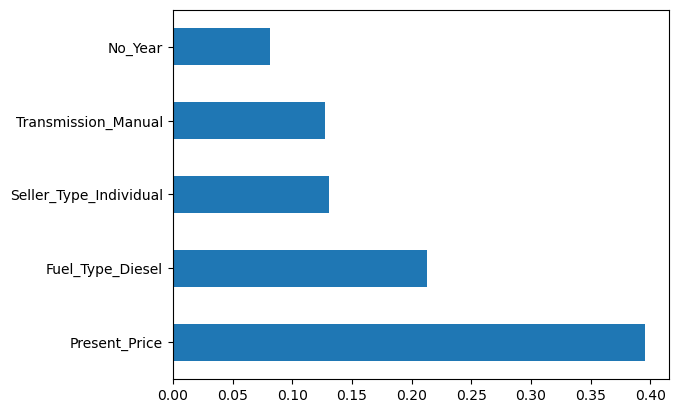

In [28]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
# Linear Regression Modeling
model = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

# Lasso Regression Modeling
model1 = Lasso()
model1.fit(X_train,y_train)
model1.predict(X_test)
model1.score(X_test,y_test)

# Ridge Regresion Modeling
model2 = Ridge(alpha = 1)
model2.fit(X_train,y_train)
model2.predict(X_test)
model2.score(X_test,y_test)

# Printing Regression Results

print(f'Linear Regression Model Result is {model.score(X_test,y_test)*100} %')
print(f'Lasso Regression Model Result is {model1.score(X_test,y_test)*100} %')
print(f'Ridge Regression Model Result is {model2.score(X_test,y_test)*100} %')

Linear Regression Model Result is 85.17983059778264 %
Lasso Regression Model Result is 81.1112127122926 %
Ridge Regression Model Result is 85.2049197664856 %


## Using Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [32]:
regressor = RandomForestRegressor()
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
 # Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 30)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 30)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [34]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 148, 196, 244, 293, 341, 389, 437, 486, 534, 582, 631, 679, 727, 775, 824, 872, 920, 968, 1017, 1065, 1113, 1162, 1210, 1258, 1306, 1355, 1403, 1451, 1500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 21, 22, 23, 23, 24, 25, 26, 27, 28, 29, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [35]:
rf = RandomForestRegressor()

In [36]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [37]:
# Use the random grid to search for best hyperparameters
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [38]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=824; total time=   1.4s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=824; total time=   1.2s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=824; total time=   1.5s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=824; total time=   1.2s
[CV] END max_depth=16, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=824; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1065; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1065; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 5, 6, 7, 8, 9, 10, 11,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 17, 18, 19, 20, 21,
                                                      22, 23, 23, 24, 25, 26,
                                                      27, 28, 29, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 148, 196, 244,
                                                         293, 341, 389, 437,
                                                         486, 534, 582, 631,
                     

In [39]:
rf.best_params_

{'n_estimators': 824,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 16}

In [40]:
y_pred = rf.predict(X_test)

In [41]:
# Model Accuracy using RandomForest Technique
r2_score(y_test,y_pred)
print(f'Accuracy of RandomForest Model is {r2_score(y_test,y_pred)*100:1f}%')

Accuracy of RandomForest Model is 91.113677%


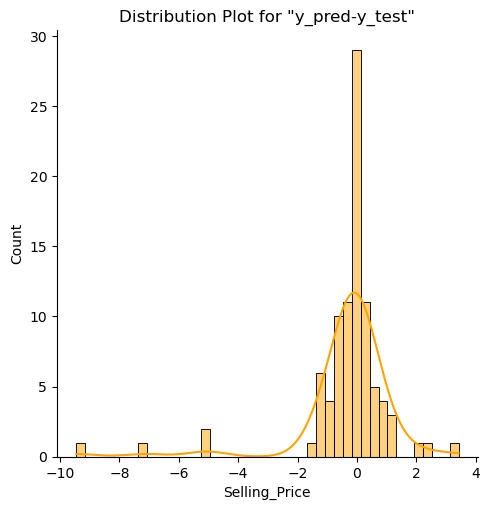

In [42]:
sns.displot(y_pred-y_test,kde=True,color='orange')
plt.title('Distribution Plot for "y_pred-y_test"')
plt.show()

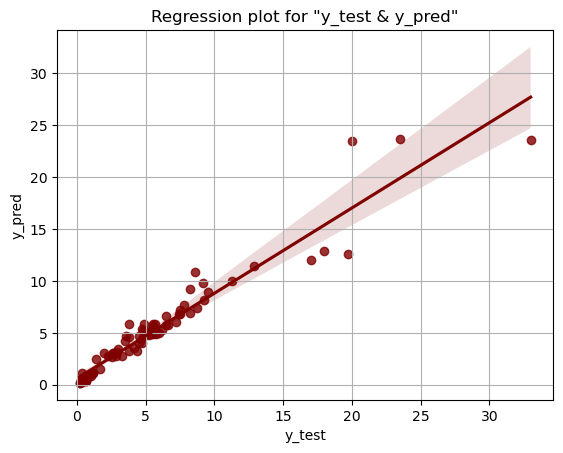

In [43]:
sns.regplot(y_test,y_pred,color='maroon')
plt.title('Regression plot for "y_test & y_pred"')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid()
plt.show()

In [44]:
# Evaluation of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.7774507399725654
MSE: 2.6575486661768717
RMSE: 1.6301989652115694


## Using XGBoost Regressor

In [45]:
import xgboost as xgb
from scipy.stats import uniform, randint

In [46]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [47]:
xgb_model.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)>

In [48]:
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [49]:
xgb = RandomizedSearchCV(estimator = xgb_model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [50]:
xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[02:44:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[02:44:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[02:44:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:l

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_f

In [51]:
xgb.best_params_

{'gamma': 0.34015376929388985,
 'learning_rate': 0.16514977559086289,
 'max_depth': 3,
 'n_estimators': 103,
 'subsample': 0.9768807022739411}

In [52]:
predictions = xgb.predict(X_test)

In [53]:
# Model Accuracy using XGBoost Technique
r2_score(y_test,predictions)
print(f'Accuracy of RandomForest Model is {r2_score(y_test,predictions)*100:1f}%')

Accuracy of RandomForest Model is 91.411561%


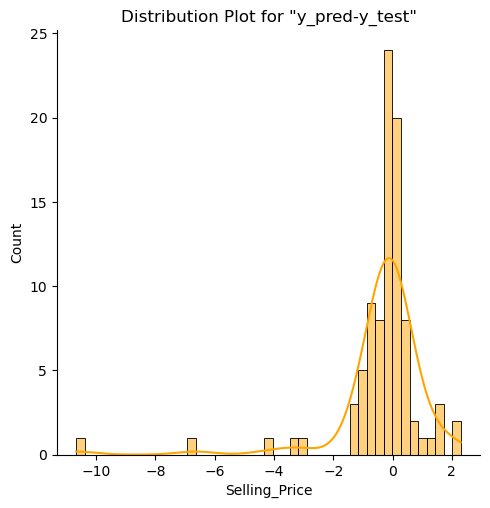

In [54]:
sns.displot(predictions-y_test,kde=True,color='orange')
plt.title('Distribution Plot for "y_pred-y_test"')
plt.show()

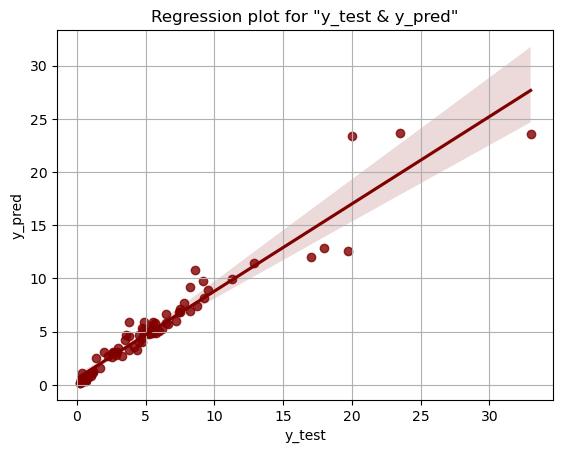

In [56]:
sns.regplot(y_test,y_pred,color='maroon')
plt.title('Regression plot for "y_test & y_pred"')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid()
plt.show()

In [58]:
# Evaluation of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.7469348757378347
MSE: 2.568463396783795
RMSE: 1.6026426291546707


## Using Catboost Regresssor

In [60]:
!pip install catboost

In [61]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor()
cbr.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostRegressor object at 0x0000028EFEB5E2E0>>

In [62]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [64]:
cbr = RandomizedSearchCV(estimator = cbr, param_distributions = grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [65]:
cbr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 4.9398622	total: 140ms	remaining: 2m 19s
1:	learn: 4.7805986	total: 160ms	remaining: 1m 19s
2:	learn: 4.5730251	total: 170ms	remaining: 56.5s
3:	learn: 4.4161829	total: 175ms	remaining: 43.7s
4:	learn: 4.2856056	total: 190ms	remaining: 37.8s
5:	learn: 4.1268798	total: 191ms	remaining: 31.7s
6:	learn: 3.9895888	total: 193ms	remaining: 27.4s
7:	learn: 3.8391546	total: 197ms	remaining: 24.4s
8:	learn: 3.7310291	total: 207ms	remaining: 22.8s
9:	learn: 3.6173828	total: 207ms	remaining: 20.5s
10:	learn: 3.4712492	total: 208ms	remaining: 18.7s
11:	learn: 3.3483253	total: 209ms	remaining: 17.2s
12:	learn: 3.2450271	total: 212ms	remaining: 16.1s
13:	learn: 3.1400164	total: 213ms	remaining: 15s
14:	learn: 3.0260343	total: 213ms	remaining: 14s
15:	learn: 2.9346526	total: 214ms	remaining: 13.1s
16:	learn: 2.8376114	total: 220ms	remaining: 12.7s
17:	learn: 2.7572800	total: 221ms	remaining: 12.1s
18:	learn: 2.6724960	total: 228ms

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000028EFEB5E2E0>,
                   n_jobs=1,
                   param_distributions={'depth': [4, 6, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
cbr.best_score_

-3.2179271237932716

In [67]:
predictions=cbr.predict(X_test)

In [68]:
# Model Accuracy using CatBoost Technique
r2_score(y_test,predictions)
print(f'Accuracy of RandomForest Model is {r2_score(y_test,predictions)*100:1f}%')

Accuracy of RandomForest Model is 88.386557%


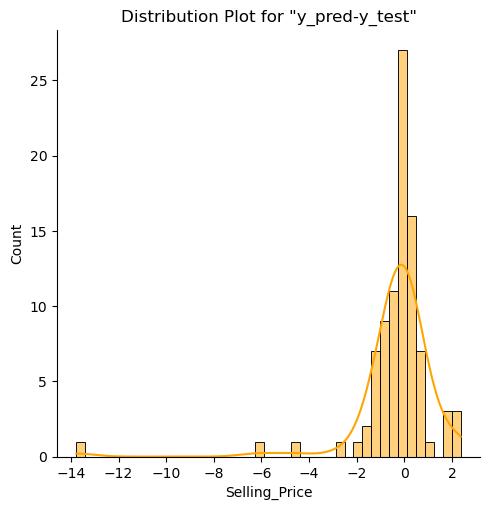

In [69]:
sns.displot(predictions-y_test,kde=True,color='orange')
plt.title('Distribution Plot for "y_pred-y_test"')
plt.show()

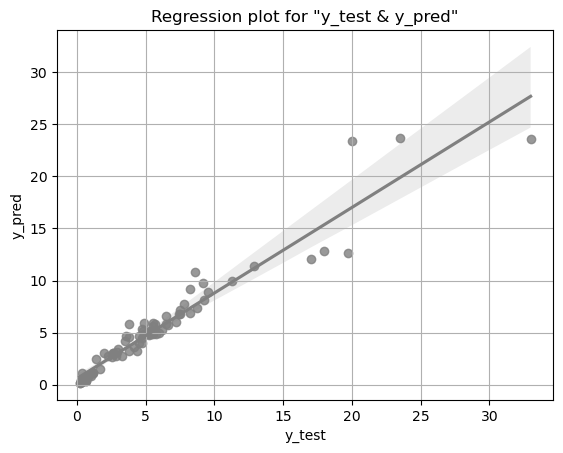

In [70]:
sns.regplot(y_test,y_pred,color='gray')
plt.title('Regression plot for "y_test & y_pred"')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid()
plt.show()

In [71]:
# Evaluation of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 0.8568669682476366
MSE: 3.4731227057809524
RMSE: 1.8636315906801302
